# Assignment #4

READ ALL INSTRUCTIONS CAREFULLY

This assignment is a puzzle. You have been given a data set with some semi-informative column headers but no additional information about it. Your goal is to investigate the data, understand as much about it as you can, and report back what you find.

You are free to use any and all of the techniques we have covered this semester: EDA, data wrangling, visualization (scatter plots, line plots, histograms, jointplots, etc.), descriptive statistics (mean, median, variance, covariance, etc.), regression / model fitting, loss functions (MSE, MAE), R^2, cross-validation, bootstrapping, gradient descent, etc... 

There are many different ways to approach this assignment and be successful. I recommend starting simple and getting slowly more sophisticated as needed.

## Collaborators

You must work in groups of 2-3. You cannot work on this assignment alone. Your partners cannot be anyone you have partnered with previously on an assignment and they cannot be in your group for the semester project.

**Names of all collaborators go here** (including yourself):

## Tools

You are not allowed to use LLMs (including the LLM results that pop up in Google search). You may use search online for ideas, use StackExchange, and I highly encourage using Python library documentation.

Hint: It may be useful to use the sklearn library for model fitting (and not to implement model fitting or optimization by hand).

## Submission Instructions

You must submit two files. One is your **Jupyter notebook** that you use to explore and analyze the data. The second file is a separate **PDF** reporting, presenting, and explaining your results with no code in it.

**Only one person** in your group should submit the assignment files on Canvas. Be sure everyone's names are listed under collaborators in both the notebook and the PDF so everyone gets credit!

## Potentially Helpful Documentation


https://scikit-learn.org/stable/api/sklearn.model_selection.html

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/api/sklearn.metrics.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

# Your Code Below

## Imports and CoW

In [1]:
# Add all of your import statements here. ONLY include the imports you actually use. There are useful tools in the scikit-learn library for regression and model fitting, but you are not required to use it. If you use it, you will need to install it into your virtual environment.

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# import seaborn as sns
# from sklearn.<something> import <something>

In [2]:
# Enforce Copy-on-Write (CoW) semantics
pd.set_option('mode.copy_on_write', True)

## Project Folder Organization and File Reading

You must read in the given data file using relative paths, as shown in previous assignments. Organize your work to be in a project folder, with src and data subfolders. Place your solution notebook in the src folder, and the given data file in the data folder.

In [3]:
# Read in the data file (using relative paths for reproducibility). It should be able to download your notebook, put it in the src folder of my project folder, and run it without changing anything.
cwd = Path().cwd()
path = cwd / 'data' / 'mystery-1.csv'
data_df = pd.read_csv(path, sep='|')
print(data_df.head())

           x           y          z         d1         d2         d3  \
0  45.257043  109.764179  38.057596 -59.072649 -14.805744  37.863842   
1  45.146703  109.814680  40.922755 -57.052267 -15.018721  37.872534   
2  47.732288  109.733472  39.181964 -42.744882  -9.708060  37.671144   
3  46.393936  109.376867  37.073853 -51.804489 -12.540430  37.774738   
4  52.908700  109.607200  37.583851 -12.337559   2.932994  37.291647   

             d4     c  
0  94095.637152  11.0  
1  93969.141494   3.0  
2  93724.024307  11.0  
3  93377.854892  10.0  
4  93101.403795   0.0  


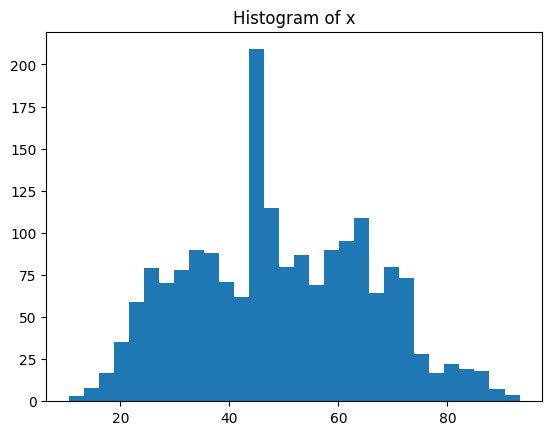

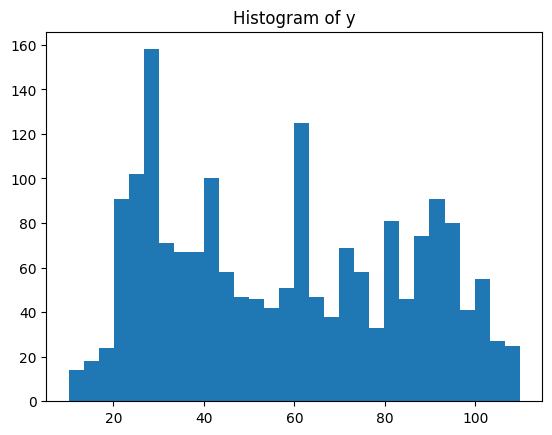

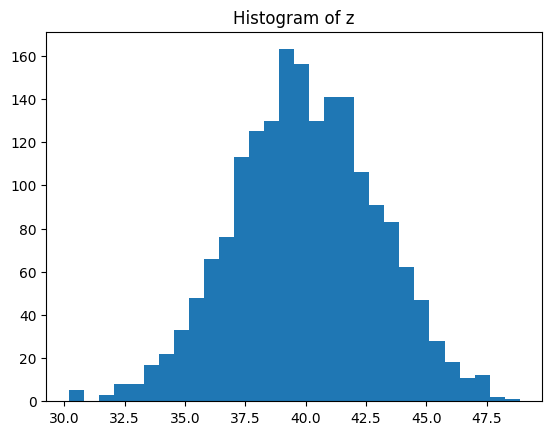

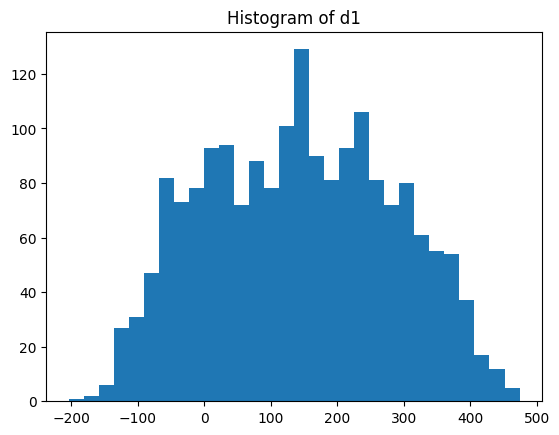

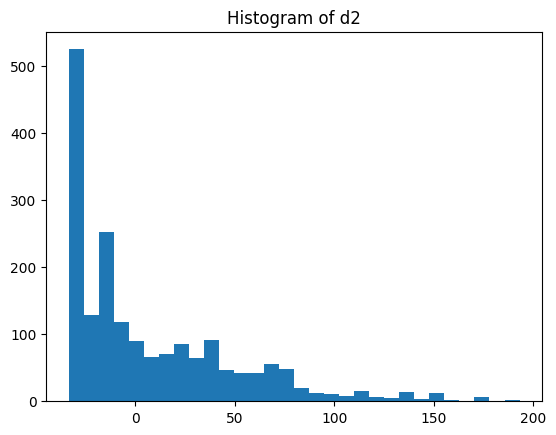

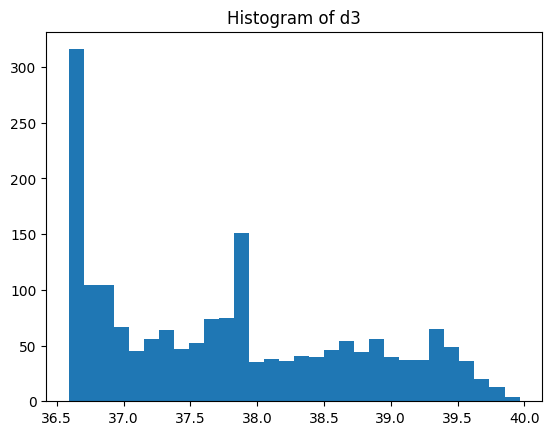

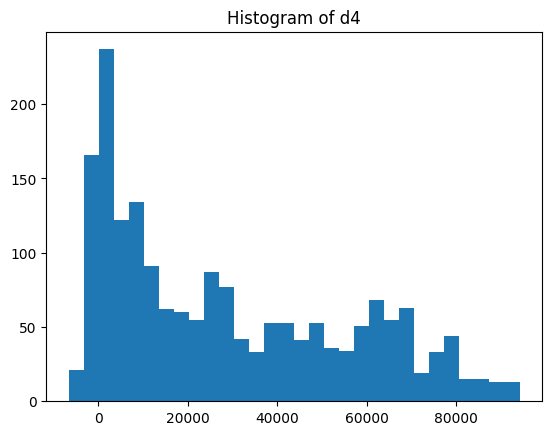

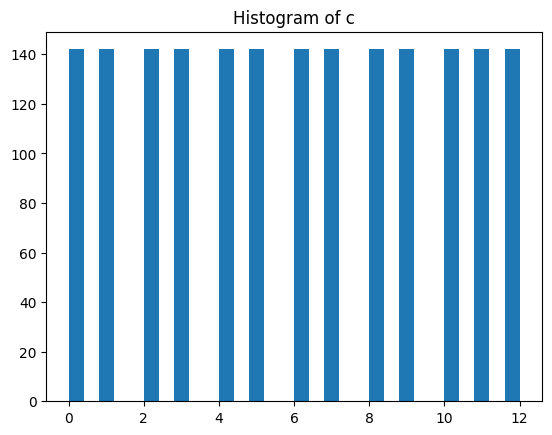

[11.  3. 10.  0. 12.  4.  1.  7.  5.  2.  9.  6.  8.]


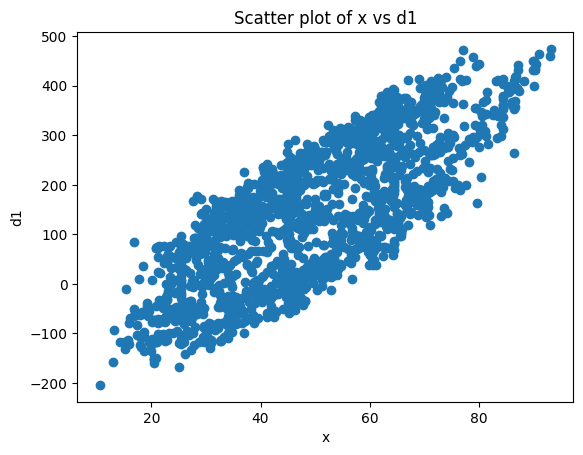

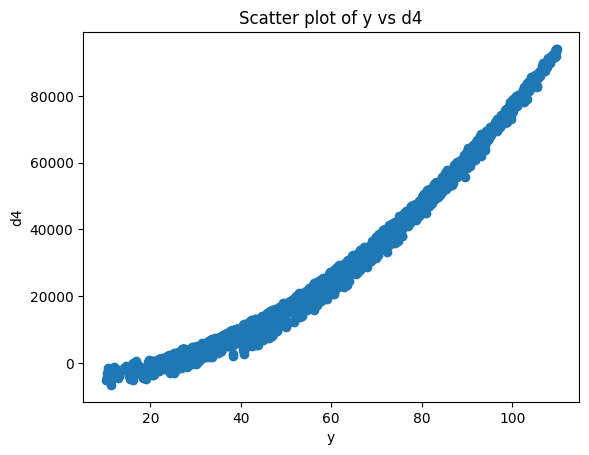

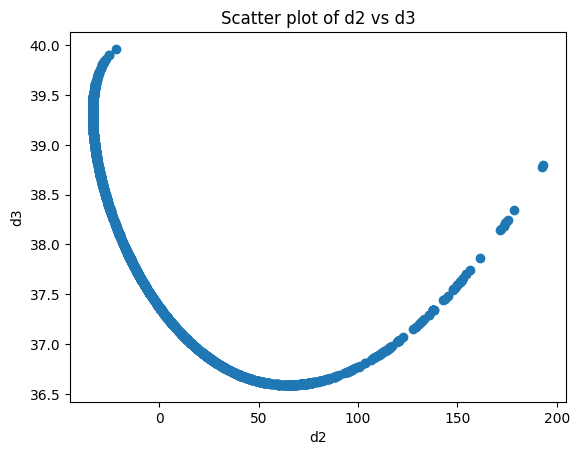

/Users/oscardehamer/dev/cs557-assignments/assignment4/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-142.5744522])

In [ ]:
data_df = data_df[data_df['x'] != -999.0]

plt.hist(data_df['x'], bins=30, label='x')
plt.title('Histogram of x')
plt.show()

plt.hist(data_df['y'], bins=30, label='y')
plt.title('Histogram of y')
plt.show()

plt.hist(data_df['z'], bins=30, label='z')
plt.title('Histogram of z')
plt.show()

plt.hist(data_df['d1'], bins=30, label='d1')
plt.title('Histogram of d1')
plt.show()

plt.hist(data_df['d2'], bins=30, label='d2')
plt.title('Histogram of d2')
plt.show()

plt.hist(data_df['d3'], bins=30, label='d3')
plt.title('Histogram of d3')
plt.show()

plt.hist(data_df['d4'], bins=30, label='d4')
plt.title('Histogram of d4')
plt.show()

plt.hist(data_df['c'], bins=30, label='c')
plt.title('Histogram of c')
plt.show()

print(data_df['c'].unique()) # c only has values 11.  3. 10.  0. 12.  4.  1.  7.  5.  2.  9.  6.  8.

plt.scatter(data_df['x'], data_df['d1']) # shows some correlation
plt.title('Scatter plot of x vs d1')
plt.xlabel('x')
plt.ylabel('d1')
plt.show()



plt.scatter(data_df['y'], data_df['d4']) # shows some correlation
plt.title('Scatter plot of y vs d4')
plt.xlabel('y')
plt.ylabel('d4')
plt.show()

plt.scatter(data_df['d2'], data_df['d3']) # shows some correlation
plt.title('Scatter plot of d2 vs d3')
plt.xlabel('d2')
plt.ylabel('d3')
plt.show()

reg = LinearRegression().fit(data_df[['x']], data_df['d1'])
reg.predict([[5.0]])

In [13]:
correlation_xd1 = data_df['x'].corr(data_df['d1'])
print(f'Correlation between x and d1: {correlation_xd1}')

correlation_yd4 = data_df['y'].corr(data_df['d4'])
print(f'Correlation between y and d4: {correlation_yd4}')

correlation_d2d3 = data_df['d2'].corr(data_df['d3'])
print(f'Correlation between d2 and d3: {correlation_d2d3}')

var = data_df['c'].var()
print(f'Variance of d2: {var}')

Correlation between x and d1: 0.7642297628673732
Correlation between y and d4: 0.9811735033551071
Correlation between d2 and d3: -0.7260937557087218
Variance of d2: 14.00758807588076
